Максимальное значение по траектории: 19.0
Минимальное значение по траектории: -561.0
Не было такого периода времени, что было сделано более 10 шагов в одну сторону
Максимальное количество шагов в одну сторону: 6


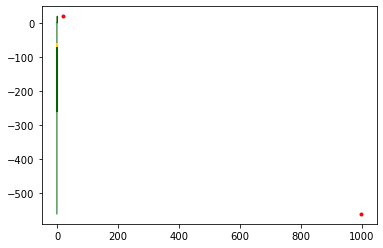

In [8]:
#красные точки - минимум и максимум
#желтая линия - траектория во время максимального количества шагов в 1 сторону

import numpy as np
import matplotlib.pyplot as plt

np.random.seed(42)

seq = np.random.randn(1000)
for x in range(1000):
    if seq[x] < 0:
        seq[x] = -1
    else:
        seq[x] = 1
        
time = np.array(range(1,1001))
trace = seq.cumsum()


#### мой тест
my_list = np.zeros(1000)
my_list[1:20] = 1
my_list[20:50] = -1
my_list[50:100] = -1
my_list[100:300] = -1
my_list[300:500] = 1
my_list[500:1000] = -1

trace = np.cumsum(my_list)
time = my_list






print('Максимальное значение по траектории:',np.amax(trace))
print('Минимальное значение по траектории:', np.amin(trace))


curr_move = seq[0]
quantity = 1
max_same = 0
ind_max_same = 0
first_ten = False

################ ??????? откуда 200 ????
for x in range(1,200):
    if seq[x] == curr_move:
        if (quantity == 10) & (first_ten == False):
            time_first_ten = x-1
            first_ten = True
        quantity += 1

    else:
        if quantity > max_same:
            max_same = quantity
            ind_max_same = x - quantity
        curr_move = seq[x]
        quantity = 1
        
        
if first_ten == False:
    print ('Не было такого периода времени, что было сделано более 10 шагов в одну сторону')
else: 
    print('Первый момент времени, когда на прогулке было сделано более 10 шагов в одну сторону:', time_first_ten)
    
    
print('Максимальное количество шагов в одну сторону:', max_same)

minimum = list(trace).index(np.amin(trace))
maximum = list(trace).index(np.amax(trace))
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(time, trace, color = 'darkgreen', linewidth = 1)
ax.scatter([maximum, minimum],
           [np.amax(trace), np.amin(trace)],
          color = 'red',
          marker = '.')
ax.plot(time[ind_max_same:(ind_max_same+max_same+1)], trace[ind_max_same:(ind_max_same+max_same+1)],
        color = 'gold', linewidth = 2)
plt.show()